In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

We use the hand written digits dataset provided by sklearn
it has about 1797 data, each one is image of size 8x8 
Here is a demonstration of a data

(1797, 64)


<Figure size 432x288 with 0 Axes>

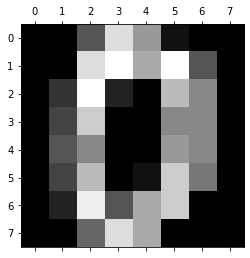

In [3]:
digits = load_digits()
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 


Principal component analysis is an algoithm that reduces the dimension of data.
For example if you have a data that has 784 attributes(i.e. dimension) then you can represent it in lower dimension like using only 10 attributes or even less. This method is not really effective, it has high vaiance.
We can use better methods like Variational Autoencoders but its too advanced to be used here, so we will be working with PCA only.

Here we reduced the 64 dimension (i.e. 8 * 8) to 2 dimension for better visualization in 2 D graph

In [4]:
pca = PCA(2)
reducedForm = pca.fit_transform(digits.data)
data = reducedForm
data

array([[ -1.25946759,  21.274887  ],
       [  7.95761116, -20.76870032],
       [  6.99192414,  -9.95598852],
       ...,
       [ 10.80128444,  -6.96025315],
       [ -4.87209834,  12.4239506 ],
       [ -0.34438896,   6.36554914]])

<Figure size 720x720 with 0 Axes>

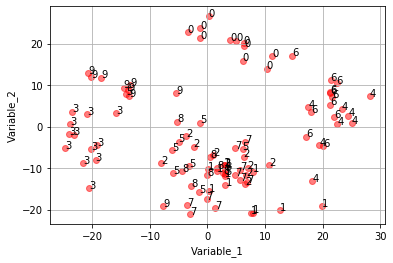

In [5]:
display = 100 # it has large dataset that's why reduce the total number dataset to be displayed
fig = plt.figure(figsize=(10,10))
x = data[:display,0]
y = data[:display,1]
fig, ax = plt.subplots()
ax.scatter(x,y,marker="o", c="red", alpha=0.5)
plt.grid()
plt.xlabel("Variable_1")
plt.ylabel("Variable_2")
for i in range(len(x)):
    ax.annotate(digits.target[i] , (x[i] , y[i])) # to label each dataset with original target label 


K-means is a centroid based technique. It takes total number of clusters as user input.
And tries to increase intra-cluster similarity and decrease inter-cluster similarity 

  Start(Total cluster k)<br>          |<br>          |<br>       Centroid <-------------<br>          |                   |<br>          |                   |<br>   Distance of each           |<br>   data with centroid         |<br>          |                   |<br>          |                   |<br>    Grouping based on         |<br>    proximity to centre       |<br>          |                   |<br>          |                   |<br>      Data Moved              |<br>    to other group  -------- Yes <br>          |<br>          | No<br>         End<br>

In [6]:
kmeans = KMeans(n_clusters = 10) # we already know that k=10 for total number of digits
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


We are using PCA to reduce dimension But Still we are able to group similar hand written digit images together

<Figure size 360x360 with 0 Axes>

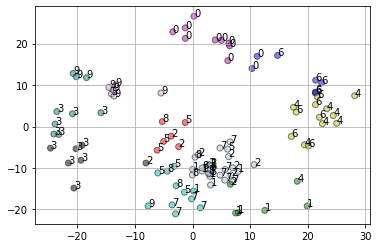

In [7]:
fig = plt.figure(figsize=(5,5))
colmap = {1:"r", 2:"g", 3:"b", 4:"c" , 5:"m" , 6:"y", 7:"k" , 8:"teal" , 9:"lightsteelblue" , 10:"plum"}
colors = map(lambda x: colmap[x+1], labels[:display])
colors1 = list(colors)
fig, ax = plt.subplots()
ax.scatter(x,y,marker="o", c=colors1, alpha=0.5, edgecolor = "k")
#for idx, centroid in enumerate (centroids):
#    plt.scatter(*centroid, color=colmap[idx+1])
for i in range(len(x)):
    ax.annotate(digits.target[i] , (x[i] , y[i]))
plt.grid()
plt.show()